In [93]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
import pandas as pd
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

font_set = FontProperties(fname=r"c:\windows\fonts\SIMLI.TTF", size=15)
plt.figure(figsize=(20,8),dpi=80)

<Figure size 1600x640 with 0 Axes>

<Figure size 1600x640 with 0 Axes>

## AHP

In [2]:
class AHP():
    
    def __init__(self,Layer=3,B=3,C=8):
        '''
        Score :比较矩阵
        Layer :层数
        B     ：准则层个数
        C     ：方案层个数
        
        '''
        self.Layer = Layer
        self.B = B
        self.C = C
        
    def decompose(self,Data):
        
        # scaler = preprocessing.StandardScaler().fit(Data)#标准化
        # DataScale = scaler.transform(Data
        DataScale = Data#网上的过程似乎只需要对特征向量标准化
        
        # 特征值，特征向量矩阵（特征向量是列向量）
        val,vec = np.linalg.eig(DataScale)
        # 注意：这里复数只取了实数部分
        val = val.real.astype(float)
        vec = vec.real.astype(float)
        order = val.argsort()
        val = np.flip(val[order],0)
        vec = np.flip(vec[:,order],1)    #按列排列
        
        return val,vec
    
    def check(self,Data,Val):
        Row = Data.shape[0]
        RI = [0,0,0.58,0.90,1.12,1.24,1.32,1.41,1.45,1.49,1.51]
        CI = np.divide((Val-Row),(Row-1))
        CR = np.divide(CI,RI[Row-1])
        
        if CR > 0.1:
            raise Exception("Failed the consistency test.Please modify the matrix.")
        else:
            print('Consistency check passed')
            
        return CR
    
    def fit(self,Data_B):
        
        B = self.B
        
        CR_C = []
        Weight_C=[]
        Val_C = []
        #首先计算准则层
        Val_B,Vec_B = AHP.decompose(self,Data_B)
        Val_BMAX = Val_B[0]
        Weight_B = Vec_B[:,0]
        Weight_B = Weight_B.T
        Weight_B = np.divide(Weight_B,sum(Weight_B))
        '''
        CR_B = AHP.check(self,Data_B, Val_BMAX)
        
        self.CR_B = CR_B
'''
        self.Weight_B = Weight_B
        self.Val_BMAX = Val_BMAX

        return Weight_B

## 数字经济规模

数字产业化

In [94]:
data_c4=pd.read_excel('./数据-补/数字经济规模/产业数字化/数字经济-产业化，数字化(1).xlsx')

In [95]:
Data_B=np.loadtxt('./数字经济规模/数字产业化.txt')
AHP_Method = AHP(B=3,C=3)
Weight_C4=AHP_Method.fit(Data_B)
Weight_C4

array([0.62607647, 0.15578884, 0.21813469])

In [96]:
def AHP_OUT(data,weight,index):
    out=pd.DataFrame()
    province=list(data['省份'].unique())
    for i in province:
        data1=data[data['省份']==i]
        data_online=data1[index[0]]
        data_phone=data1[index[1]]
        data_num=data1[index[2]]
        data_1=pd.DataFrame(data_online)
        data_2=pd.DataFrame(data_phone)
        data_3=pd.DataFrame(data_num)
        minmax_scaler=preprocessing.MinMaxScaler()
        data_online=minmax_scaler.fit_transform(data_1)
        data_phone=minmax_scaler.fit_transform(data_2)
        data_num=minmax_scaler.fit_transform(data_3)
        data_C=data_online*weight[0]+data_phone*weight[1]+data_num*weight[2]
        data_C=pd.Series(data_C.squeeze(1))
        out[i]=data_C
    
    out.index=list(data_c4['Year'].unique())
    return out

In [97]:
index_c4=['互联网宽带接入用户(万户)','移动电话普及率(部/百人)','电信业务总量(亿元)']
out_C4=AHP_OUT(data_c4,Weight_C4,index_c4)
out_C4

,安徽,北京,福建,甘肃,广东,广西,贵州,海南,河北,河南,...,山东,山西,陕西,上海,四川,天津,新疆,云南,浙江,重庆
1997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1998,0.004669,0.017093,0.010045,0.003650,0.010694,0.004736,0.004030,0.005685,0.007024,0.005025,...,0.008004,0.007769,0.006488,0.013299,0.004438,0.007661,0.006190,0.004684,0.009022,0.005202
1999,0.009887,0.035034,0.020766,0.007648,0.022078,0.010051,0.008508,0.011856,0.014758,0.010621,...,0.016739,0.016296,0.013602,0.027536,0.009387,0.015988,0.012898,0.009905,0.018727,0.011007
2000,0.015739,0.053875,0.032246,0.012051,0.034220,0.016027,0.013500,0.018586,0.023288,0.016869,...,0.026291,0.025669,0.021424,0.042788,0.014922,0.025063,0.020198,0.015739,0.029198,0.017501
2001,0.022329,0.073670,0.044576,0.016923,0.047188,0.022758,0.019084,0.025958,0.032714,0.023865,...,0.036759,0.035984,0.030051,0.059133,0.021134,0.034981,0.028176,0.022280,0.040528,0.024780
2002,0.029781,0.094481,0.057862,0.022347,0.061063,0.030352,0.025356,0.034074,0.043147,0.031719,...,0.048252,0.047354,0.039592,0.076660,0.028129,0.045850,0.036932,0.029634,0.052822,0.032958
2003,0.038241,0.116372,0.072223,0.028421,0.075931,0.038936,0.032426,0.043052,0.054716,0.040559,...,0.060897,0.059904,0.050174,0.095464,0.036031,0.057793,0.046583,0.037927,0.066202,0.042166
2004,0.047883,0.139414,0.087793,0.035269,0.091888,0.048655,0.040428,0.053034,0.067566,0.050538,...,0.074834,0.073774,0.061944,0.115650,0.044989,0.070950,0.057270,0.047308,0.080804,0.052559
2005,0.058918,0.163682,0.104725,0.043039,0.109037,0.059678,0.049523,0.064187,0.081863,0.061830,...,0.090227,0.089125,0.075072,0.137333,0.055176,0.085483,0.069153,0.057950,0.096785,0.064312
2006,0.071594,0.189261,0.123193,0.051917,0.127496,0.072201,0.059904,0.076710,0.097799,0.074642,...,0.107258,0.106138,0.089756,0.160635,0.066799,0.101577,0.082425,0.070060,0.114325,0.077635


产业数字化

In [98]:
Data_B=np.loadtxt('./数字经济规模/产业数字化.txt')
AHP_Method = AHP(B=3,C=3)
Weight_C5=AHP_Method.fit(Data_B)
Weight_C5

array([0.63770782, 0.10694515, 0.25534703])

In [99]:
index_c5=['网上零售额（亿元）','邮政业务总量(亿元)','信息传输、软件和信息技术服务业城镇单位就业人员(万人)']
out_C5=AHP_OUT(data_c4,Weight_C5,index_c5)
out_C5

,安徽,北京,福建,甘肃,广东,广西,贵州,海南,河北,河南,...,山东,山西,陕西,上海,四川,天津,新疆,云南,浙江,重庆
1997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.362292,0.000000,0.000000,0.000000,...,0.000000,0.239039,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1998,0.003840,0.006771,0.003921,0.004922,0.001088,0.004634,0.000017,0.002734,0.004977,0.002204,...,0.004146,0.229898,0.008430,0.001480,0.002171,0.002278,0.006125,0.005098,0.004428,0.007125
1999,0.008065,0.014292,0.008261,0.010184,0.002351,0.009437,0.000241,0.005794,0.010281,0.004721,...,0.008677,0.220870,0.017673,0.003278,0.004698,0.004914,0.012600,0.010305,0.009425,0.014624
2000,0.012727,0.022660,0.013079,0.015816,0.003820,0.014432,0.000518,0.009225,0.015948,0.007603,...,0.013642,0.211968,0.027821,0.005466,0.007646,0.007970,0.019454,0.015638,0.015074,0.022545
2001,0.017894,0.031983,0.018450,0.021854,0.005528,0.019651,0.000863,0.013077,0.022023,0.010914,...,0.019104,0.203207,0.038980,0.008129,0.011097,0.011526,0.026719,0.021117,0.021472,0.030948
2002,0.023647,0.042388,0.024459,0.028342,0.007516,0.025133,0.001295,0.017412,0.028561,0.014732,...,0.025136,0.194608,0.051267,0.011371,0.015146,0.015674,0.034434,0.026772,0.028734,0.039906
2003,0.030088,0.054018,0.031213,0.035332,0.009832,0.030932,0.001840,0.022304,0.035631,0.019154,...,0.031830,0.186197,0.064815,0.015322,0.019912,0.020531,0.042643,0.032642,0.036993,0.049510
2004,0.037347,0.067039,0.038841,0.042888,0.012531,0.037116,0.002532,0.027841,0.043318,0.024297,...,0.039299,0.178010,0.079778,0.020138,0.025537,0.026236,0.051401,0.038779,0.046406,0.059870
2005,0.045589,0.081640,0.047500,0.051088,0.015682,0.043777,0.003417,0.034132,0.051735,0.030309,...,0.047680,0.170095,0.096327,0.026014,0.032200,0.032961,0.060776,0.045254,0.057156,0.071127
2006,0.055030,0.098038,0.057384,0.060032,0.019364,0.051035,0.004559,0.041312,0.061020,0.037373,...,0.057148,0.162516,0.114660,0.033185,0.040114,0.040917,0.070855,0.052164,0.069462,0.083451


惠普金融指数

In [100]:
data_c6=pd.read_excel('../综合评价/数据-补/数字经济规模/中国数字惠普金融指数/普惠.xlsx')
province=list(data_c6['省份'].unique())
out_C6=pd.DataFrame()
for i in province:
    data1=data_c6[data_c6['省份']==i]
    data1=data1['index_aggregate']
    data_index=pd.DataFrame(data1)
    minmax_scaler=preprocessing.MinMaxScaler()
    data_index=minmax_scaler.fit_transform(data_index)
    data_C=pd.Series(data_index.squeeze(1))
    out_C6[i]=data_C
out_C6.index=list(data_c4['Year'].unique())
out_C6

,安徽,北京,福建,甘肃,广东,广西,贵州,海南,河北,河南,...,山东,山西,陕西,上海,四川,天津,新疆,云南,浙江,重庆
1997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1998,0.002557,0.004510,0.003459,0.001108,0.003950,0.001922,0.000999,0.002621,0.001896,0.001404,...,0.002215,0.001972,0.002293,0.004325,0.002417,0.003695,0.001314,0.001453,0.004431,0.002452
1999,0.005654,0.009708,0.007504,0.002481,0.008536,0.004240,0.002244,0.005731,0.004184,0.003125,...,0.004867,0.004348,0.005033,0.009322,0.005297,0.008000,0.002929,0.003231,0.009542,0.005371
2000,0.009404,0.015699,0.012234,0.004185,0.013860,0.007036,0.003796,0.009421,0.006946,0.005233,...,0.008043,0.007210,0.008308,0.015095,0.008730,0.013016,0.004916,0.005405,0.015440,0.008848
2001,0.013945,0.022605,0.017765,0.006298,0.020041,0.010408,0.005732,0.013801,0.010280,0.007818,...,0.011844,0.010656,0.012222,0.021763,0.012821,0.018861,0.007359,0.008066,0.022244,0.012989
2002,0.019445,0.030564,0.024233,0.008920,0.027218,0.014475,0.008145,0.018999,0.014303,0.010986,...,0.016395,0.014807,0.016899,0.029468,0.017696,0.025671,0.010363,0.011322,0.030094,0.017920
2003,0.026106,0.039738,0.031796,0.012171,0.035550,0.019379,0.011153,0.025167,0.019158,0.014868,...,0.021844,0.019807,0.022489,0.038368,0.023507,0.033607,0.014057,0.015305,0.039152,0.023793
2004,0.034172,0.050313,0.040639,0.016203,0.045223,0.025295,0.014904,0.032488,0.025018,0.019626,...,0.028368,0.025829,0.029169,0.048650,0.030433,0.042853,0.018601,0.020177,0.049601,0.030786
2005,0.043940,0.062501,0.050981,0.021205,0.056453,0.032429,0.019581,0.041175,0.032091,0.025458,...,0.036178,0.033083,0.037152,0.060529,0.038686,0.053627,0.024187,0.026139,0.061657,0.039115
2006,0.055769,0.076549,0.063073,0.027409,0.069492,0.041034,0.025411,0.051485,0.040627,0.032605,...,0.045528,0.041819,0.046693,0.074252,0.048523,0.066181,0.031057,0.033433,0.075567,0.049034


数字经济规模B2out

In [101]:
Data_B=np.loadtxt('./数字经济规模/准则层.txt')
AHP_Method = AHP(B=3,C=3)
Weight_B2=AHP_Method.fit(Data_B)
Weight_B2

array([0.20951797, 0.1366695 , 0.65381254])

In [102]:
out_B2=pd.DataFrame()
for i in province:
    out=out_C4[i]*Weight_B2[0]+out_C5[i]*Weight_B2[1]+out_C6[i]*Weight_B2[2]
    out_B2[i]=out
out_B2.index=list(data_c4['Year'].unique())
out_B2

,安徽,北京,福建,甘肃,广东,广西,贵州,海南,河北,河南,...,山东,山西,陕西,上海,四川,天津,新疆,云南,浙江,重庆
1997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.049514,0.000000,0.000000,0.000000,...,0.000000,0.032669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1998,0.003175,0.007455,0.004902,0.002162,0.004972,0.002882,0.001500,0.003278,0.003392,0.002272,...,0.003692,0.034337,0.004011,0.005816,0.002807,0.004332,0.002993,0.002628,0.005392,0.003667
1999,0.006870,0.015641,0.010386,0.004617,0.010528,0.006168,0.003283,0.007023,0.007233,0.004913,...,0.007875,0.036443,0.008556,0.012312,0.006072,0.009251,0.006340,0.005596,0.011451,0.007817
2000,0.011185,0.024649,0.016542,0.007423,0.016753,0.009931,0.005381,0.011314,0.011600,0.007995,...,0.012631,0.039061,0.013723,0.019581,0.009879,0.014850,0.010105,0.008969,0.018272,0.012533
2001,0.016242,0.034585,0.023476,0.010650,0.023746,0.014259,0.007864,0.016249,0.016585,0.011603,...,0.018056,0.042279,0.019615,0.027730,0.014327,0.021236,0.014366,0.012828,0.025969,0.017914
2002,0.022185,0.045572,0.031310,0.014387,0.031616,0.019258,0.010815,0.021941,0.022295,0.015842,...,0.024265,0.046200,0.026351,0.036882,0.019534,0.028533,0.019219,0.017270,0.034670,0.024076
2003,0.029192,0.057746,0.040186,0.018741,0.040495,0.025056,0.014337,0.028523,0.028859,0.020837,...,0.031391,0.050948,0.034074,0.047181,0.025640,0.036887,0.024779,0.022414,0.044524,0.031157
2004,0.037478,0.071267,0.050273,0.023845,0.050532,0.031805,0.018561,0.036157,0.036434,0.026741,...,0.039597,0.056673,0.042953,0.058791,0.032813,0.046469,0.031185,0.028404,0.055702,0.039323
2005,0.047303,0.086316,0.061766,0.029864,0.061898,0.039689,0.023645,0.045034,0.045204,0.033741,...,0.049074,0.063550,0.053185,0.071904,0.041255,0.057477,0.038609,0.035417,0.068402,0.048769
2006,0.058984,0.103101,0.074892,0.037002,0.074794,0.048931,0.029788,0.055379,0.055392,0.042064,...,0.060050,0.071791,0.065004,0.086738,0.051203,0.070145,0.047259,0.043667,0.082853,0.059730


bp

In [13]:
# 对个省份指标归一化后进行concat构造样本集合
data_C45=data_c4[['省份','互联网宽带接入用户(万户)','移动电话普及率(部/百人)','电信业务总量(亿元)','网上零售额（亿元）','邮政业务总量(亿元)','信息传输、软件和信息技术服务业城镇单位就业人员(万人)']]
data_B2_train=pd.DataFrame()

for i in province:
    data_B2=data_C45[data_C45['省份']==i]
    data_B2['C6']=np.array(data_c6[data_c6['省份']==i]['index_aggregate'])
    data_B2['index']=np.array(out_B2[i])
    min_max_scaler = preprocessing.MinMaxScaler()
    df0=min_max_scaler.fit_transform(data_B2.iloc[:,1:8])
    df = pd.DataFrame(df0)
    df['index']=np.array(data_B2['index'])
    data_B2_train=pd.concat([df,data_B2_train],axis=0)

df=data_B2_train.iloc[:,0:]

C:\Users\60580\AppData\Local\Temp\ipykernel_12176\3924311896.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_B2['C6']=np.array(data_C6[data_C6['省份']==i]['index_aggregate'])
C:\Users\60580\AppData\Local\Temp\ipykernel_12176\3924311896.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_B2['index']=np.array(out_B2[i])
C:\Users\60580\AppData\Local\Temp\ipykernel_12176\3924311896.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [15]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
#生成训练集与测试集
cut=700 
x_train, x_test=x.iloc[:cut],x.iloc[cut:]#列表的切片操作，X.iloc[0:2400，0:7]即为1-2400行，1-7列
y_train, y_test=y.iloc[:cut],y.iloc[cut:]
print(x_train.shape)
x_train, x_test=x_train.values, x_test.values
y_train, y_test=y_train.values, y_test.values

(700, 7)


In [16]:
def inverse_transform_col(scaler,y,n_col):
    '''scaler是对包含多个feature的X拟合的,y对应其中一个feature,n_col为y在X中对应的列编号.返回y的反归一化结果'''
    y = y.copy()
    y -= scaler.min_[n_col]
    y /= scaler.scale_[n_col]
    return y

In [18]:
import random
import numpy as np


def sigmoid(x):
    '''
    激活函数
    '''
    return 1.0 / (1.0 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

class BPNNRegression:
    '''
    神经网络回归与分类的差别在于：
    1. 输出层不需要再经过激活函数
    2. 输出层的 w 和 b 更新量计算相应更改
    '''
    def __init__(self, sizes):

        # 神经网络结构
        self.num_layers = len(sizes)
        self.sizes = sizes

        # 初始化偏差，除输入层外， 其它每层每个节点都生成一个 biase 值（0-1）
        self.biases = [np.random.randn(n, 1) for n in sizes[1:]]
        # 随机生成每条神经元连接的 weight 值（0-1）
        self.weights = [np.random.randn(r, c)
                        for c, r in zip(sizes[:-1], sizes[1:])]
        
    def feed_forward(self, a):
        '''
        前向传输计算输出神经元的值
        '''
        for i, b, w in zip(range(len(self.biases)), self.biases, self.weights):
            # 输出神经元不需要经过激励函数
            if i == len(self.biases) - 1:
                a = np.dot(w, a) + b
                break
            a = sigmoid(np.dot(w, a) + b)
        return a
    
    def MSGD(self, training_data, epochs, mini_batch_size, eta, error = 0.01):
        '''
        小批量随机梯度下降法
        '''
        n = len(training_data)
        for j in range(epochs):
            # 随机打乱训练集顺序
            random.shuffle(training_data)
            # 根据小样本大小划分子训练集集合
            mini_batchs = [training_data[k:k+mini_batch_size]
                            for k in range(0, n, mini_batch_size)]
            # 利用每一个小样本训练集更新 w 和 b
            for mini_batch in mini_batchs:
                self.updata_WB_by_mini_batch(mini_batch, eta)
            
            #迭代一次后结果
            err_epoch = self.evaluate(training_data)
            print("Epoch {0} Error {1}".format(j, err_epoch))
            if err_epoch < error:
                break
            # if test_data:
            #     print("Epoch {0}: {1} / {2}".format(j, self.evaluate(test_data), n_test))
            # else:
            # print("Epoch {0}".format(j))
        return err_epoch
    
    def updata_WB_by_mini_batch(self, mini_batch, eta):
        '''
        利用小样本训练集更新 w 和 b
        mini_batch: 小样本训练集
        eta: 学习率
        '''
        # 创建存储迭代小样本得到的 b 和 w 偏导数空矩阵，大小与 biases 和 weights 一致，初始值为 0   
        batch_par_b = [np.zeros(b.shape) for b in self.biases]
        batch_par_w = [np.zeros(w.shape) for w in self.weights]

        for x, y in mini_batch:
            # 根据小样本中每个样本的输入 x, 输出 y, 计算 w 和 b 的偏导
            delta_b, delta_w = self.back_propagation(x, y)
            # 累加偏导 delta_b, delta_w 
            batch_par_b = [bb + dbb for bb, dbb in zip(batch_par_b, delta_b)]
            batch_par_w = [bw + dbw for bw, dbw in zip(batch_par_w, delta_w)]
        # 根据累加的偏导值 delta_b, delta_w 更新 b, w
        # 由于用了小样本，因此 eta 需除以小样本长度
        self.weights = [w - (eta / len(mini_batch)) * dw
                        for w, dw in zip(self.weights, batch_par_w)]
        self.biases = [b - (eta / len(mini_batch)) * db
                        for b, db in zip(self.biases, batch_par_b)]

    def back_propagation(self, x, y):
        '''
        利用误差后向传播算法对每个样本求解其 w 和 b 的更新量
        x: 输入神经元，行向量
        y: 输出神经元，行向量
        
        '''
        delta_b = [np.zeros(b.shape) for b in self.biases]
        delta_w = [np.zeros(w.shape) for w in self.weights]

        # 前向传播，求得输出神经元的值
        a = x # 神经元输出值
        # 存储每个神经元输出
        activations = [x] 
        # 存储经过 sigmoid 函数计算的神经元的输入值，输入神经元除外
        zs = []
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, a) + b
            zs.append(z)
            a = sigmoid(z) # 输出神经元
            activations.append(a)
        #-------------
        activations[-1] = zs[-1] # 更改神经元输出结果
        #-------------
        # 求解输出层δ
        # 与分类问题不同，Delta计算不需要乘以神经元输入的倒数
        #delta = self.cost_function(activations[-1], y) * sigmoid_prime(zs[-1])
        delta = self.cost_function(activations[-1], y) #更改后
        #-------------
        delta_b[-1] = delta
        delta_w[-1] = np.dot(delta, activations[-2].T)
        for lev in range(2, self.num_layers):
            # 从倒数第1层开始更新，因此需要采用-lev
            # 利用 lev + 1 层的 δ 计算 l 层的 δ 
            z = zs[-lev]
            zp = sigmoid_prime(z)
            delta = np.dot(self.weights[-lev+1].T, delta) * zp
            delta_b[-lev] = delta
            delta_w[-lev] = np.dot(delta, activations[-lev-1].T)
        return (delta_b, delta_w)
    
    def evaluate(self, train_data):
        test_result = [[self.feed_forward(x), y]
                        for x, y in train_data]
        return np.sum([0.5 * (x - y) ** 2 for (x, y) in test_result])
    
    def predict(self, test_input):
        test_result = [self.feed_forward(x)
                        for x in test_input]
        return test_result

    def cost_function(self, output_a, y):
        '''
        损失函数
        '''
        return (output_a - y)
    pass


In [19]:
bp1 = BPNNRegression([7,32, 1])
train_data = [[sx.reshape(7,1), sy.reshape(1,1)] for sx, sy in zip(x_train, y_train)]
test_data = [np.reshape(sx, (7,1)) for sx in x_test]
bp1.MSGD(train_data,60000, len(train_data), 0.2)

Epoch 0 Error 202.65049695776244
Epoch 1 Error 185.2910672603273
Epoch 2 Error 186.9651868227101
Epoch 3 Error 213.2677997507966
Epoch 4 Error 274.9570577198408
Epoch 5 Error 391.5813283813621
Epoch 6 Error 594.1060405024992
Epoch 7 Error 934.3545297747306
Epoch 8 Error 1481.8905688977552
Epoch 9 Error 2342.394367784953
Epoch 10 Error 3591.6734990936307
Epoch 11 Error 5293.16946984849
Epoch 12 Error 7154.425525390958
Epoch 13 Error 8741.54461744836
Epoch 14 Error 8928.010809657448
Epoch 15 Error 7662.364991440276
Epoch 16 Error 5122.666417528248
Epoch 17 Error 2932.6967436552613
Epoch 18 Error 1416.0986636145828
Epoch 19 Error 654.6387586856395
Epoch 20 Error 291.00184913654846
Epoch 21 Error 134.67541115508192
Epoch 22 Error 67.05408026257143
Epoch 23 Error 38.600383676990006
Epoch 24 Error 26.41202766708681
Epoch 25 Error 21.126581606937314
Epoch 26 Error 18.71052358906298
Epoch 27 Error 17.502905600138675
Epoch 28 Error 16.803389591445903
Epoch 29 Error 16.32179428040766
Epoch 30 Er

0.011963578040316811

In [20]:
y_predict=bp1.predict(test_data)
y_pre = np.array(y_predict)  # 列表转数组
print(y_pre.shape)
y_pre=y_pre.reshape(80,1)
y_pre=y_pre[:,0]

(80, 1, 1)


In [514]:
y_pre=inverse_transform_col(min_max_scaler,y_pre,n_col=0)      # 对预测值反归一化
y_test=inverse_transform_col(min_max_scaler,y_test,n_col=0)

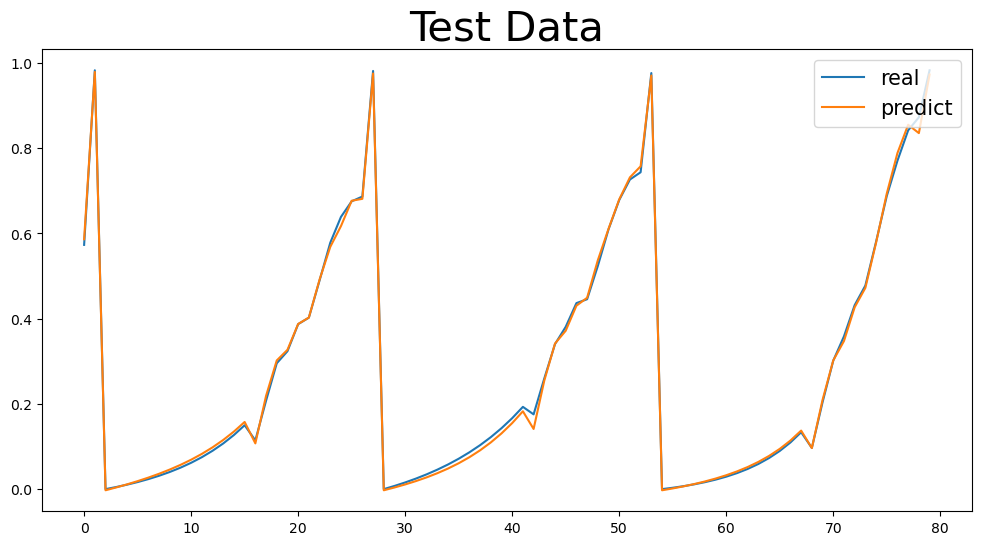

In [21]:
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_pre)],axis=1);
draw.iloc[:,0].plot(figsize=(12,6))
draw.iloc[:,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题
plt.show()


In [22]:
print('测试集上的MAE/MSE')
print(mean_absolute_error(y_pre, y_test))
print(mean_squared_error(y_pre, y_test) )
mape = np.mean(np.abs((y_pre-y_test)/(y_test)))*100
print('=============mape==============')
print(mape,'%')
# 画出真实数据和预测数据的对比曲线图
print("R2 = ",metrics.r2_score(y_test, y_pre)) # R2


测试集上的MAE/MSE
0.006830757461694423
8.654684767508715e-05
=============mape==============
inf %
R2 =  0.9990009107673486


C:\Users\60580\AppData\Local\Temp\ipykernel_12176\583697383.py:4: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs((y_pre-y_test)/(y_test)))*100


In [23]:
x=x.values

In [24]:
x = [np.reshape(sx, (7,1)) for sx in x]
y_predict=bp1.predict(x)
y_pre = np.array(y_predict)
y_pre=y_pre.reshape(780,1)

In [25]:
train_out=pd.DataFrame()
a=1
for i in province:
    train_out[i]=y_pre[26*(a-1):26*a].squeeze(1)
    a+=1
    
train_out

,安徽,北京,福建,甘肃,广东,广西,贵州,海南,河北,河南,...,山东,山西,陕西,上海,四川,天津,新疆,云南,浙江,重庆
0,-0.002722,-0.002722,-0.002722,-0.002722,-0.002722,-0.002722,-0.002722,-0.002722,0.039392,-0.002722,...,-0.002722,-0.002722,-0.002722,0.070653,-0.002722,-0.002722,-0.002722,-0.002722,-0.002722,-0.002722
1,0.001912,0.004121,0.000944,0.001156,0.002706,0.001017,0.003003,0.002328,0.039118,0.002038,...,0.000411,0.001617,0.001736,-0.000383,0.000908,0.002944,0.000591,0.003956,0.003822,0.001626
2,0.006869,0.011537,0.004843,0.005138,0.008665,0.005206,0.009381,0.007767,0.039601,0.007194,...,0.003896,0.006308,0.006570,0.002011,0.004860,0.009143,0.004086,0.011071,0.010959,0.006450
3,0.012225,0.019620,0.009039,0.009290,0.015238,0.009915,0.016510,0.013668,0.040880,0.012819,...,0.007793,0.011424,0.011845,0.004697,0.009200,0.015965,0.007801,0.018709,0.018811,0.011836
4,0.018075,0.028475,0.013607,0.013697,0.022520,0.015228,0.024500,0.020125,0.042998,0.019004,...,0.012174,0.017055,0.017638,0.007735,0.014010,0.023513,0.011789,0.026972,0.027523,0.017887
5,0.024532,0.038226,0.018642,0.018469,0.030623,0.021242,0.033481,0.027253,0.046015,0.025859,...,0.017128,0.023311,0.024046,0.011198,0.019392,0.031909,0.016119,0.035979,0.037268,0.024731
6,0.031738,0.049022,0.024257,0.023747,0.039680,0.028076,0.043603,0.035191,0.050008,0.033517,...,0.022766,0.030328,0.031187,0.015179,0.025468,0.041289,0.020881,0.045868,0.048242,0.032525
7,0.039861,0.061030,0.030595,0.029707,0.049848,0.035874,0.055037,0.044110,0.055082,0.042142,...,0.029224,0.038267,0.039207,0.019793,0.032387,0.051817,0.026194,0.056805,0.060676,0.041463
8,0.049110,0.074449,0.037830,0.036566,0.061313,0.044808,0.067986,0.054218,0.061375,0.051929,...,0.036670,0.047327,0.048287,0.025189,0.040332,0.063675,0.032211,0.068979,0.074830,0.051786
9,0.059735,0.089510,0.046178,0.044592,0.074294,0.055090,0.082685,0.065767,0.069073,0.063112,...,0.045313,0.057745,0.058651,0.031554,0.049528,0.077078,0.039134,0.082612,0.090995,0.063789


## 数据要素供给指数

制度环境

In [138]:
data_c1=pd.read_excel('./数据-补/数据要素供给指数/制度环境/2022年-1997年市场化指数（含分项指数）(1).xlsx')

政府与市场关系  要素市场发育程度 市场中介组织的发育和法律制度环境

In [104]:
Data_B=np.loadtxt('./数字要素供给指数/制度环境.txt')
AHP_Method = AHP(B=3,C=3)
Weight_C1=AHP_Method.fit(Data_B)
Weight_C1

array([0.61565121, 0.13990408, 0.24444471])

In [129]:
index_c1=['政府与市场关系','中介与法律发展','市场中介组织的发育和法律制度环境']
out_C1=AHP_OUT(data_c1,Weight_C1,index_c1)
out_C1

d:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
d:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


,上海,云南,内蒙古,北京,吉林,四川,天津,宁夏,安徽,山东,...,湖南,甘肃,福建,西藏,贵州,辽宁,重庆,陕西,青海,黑龙江
1997,0.075814,0.056194,0.091942,0.314861,0.211553,0.197907,0.015005,0.122230,0.024055,0.117229,...,0.400845,0.268640,0.034416,NaN,0.271615,0.265872,0.278171,0.034116,0.207504,0.162559
1998,0.030828,0.128747,0.060792,0.263386,0.213593,0.169727,0.053408,0.100267,0.007644,0.191894,...,0.503824,0.312699,0.007730,NaN,0.364717,0.267633,0.321717,0.207794,0.193571,0.149812
1999,0.144675,0.328068,0.261895,0.003465,0.263512,0.225009,0.080050,0.231127,0.283856,0.164232,...,0.161344,0.442869,0.282254,NaN,0.370111,0.103589,0.243055,0.259537,0.284721,0.082763
2000,0.185393,0.374236,0.212629,0.044360,0.210594,0.239609,0.108063,0.196994,0.326657,0.232939,...,0.193818,0.422675,0.317747,NaN,0.348035,0.133913,0.245760,0.262540,0.236782,0.004068
2001,0.406858,0.365322,0.302577,0.392884,0.024171,0.097381,0.175189,0.355676,0.212244,0.043129,...,0.218620,0.391761,0.396645,NaN,0.434781,0.059060,0.226366,0.370916,0.458337,0.035291
2002,0.482006,0.372375,0.444190,0.464016,0.144738,0.152950,0.218691,0.447635,0.256817,0.147000,...,0.310368,0.365425,0.453208,NaN,0.441219,0.163276,0.228620,0.471054,0.408743,0.203605
2003,0.550372,0.387011,0.488677,0.469381,0.208005,0.255648,0.256041,0.552432,0.350663,0.239027,...,0.383511,0.383482,0.544615,NaN,0.468290,0.294061,0.248634,0.525273,0.366458,0.316139
2004,0.654695,0.445268,0.609199,0.679671,0.477185,0.462221,0.350669,0.679768,0.504575,0.422152,...,0.516875,0.510249,0.654577,NaN,0.588709,0.520904,0.493010,0.635464,0.503547,0.525132
2005,0.680514,0.732690,0.765626,0.738215,0.669707,0.779344,0.510117,0.774852,0.754704,0.714502,...,0.736484,0.738574,0.745566,NaN,0.770658,0.809891,0.746328,0.629349,0.730543,0.764749
2006,0.676190,0.747997,0.786609,0.736000,0.691560,0.779585,0.519200,0.768255,0.766028,0.743803,...,0.734484,0.733871,0.743862,NaN,0.766664,0.809286,0.724531,0.592588,0.782336,0.748572


基础环境

In [107]:
data_c2=pd.read_excel('./数据-补/数据要素供给指数/基础设施/数字经济-信息化基础（2013-2020年）.xlsx')

In [108]:
Data_B=np.loadtxt('./数字要素供给指数/基础环境.txt')
AHP_Method = AHP(B=3,C=3)
Weight_C2=AHP_Method.fit(Data_B)
Weight_C2

array([0.5993176 , 0.25100785, 0.14967455])

In [109]:
index_c2=['光缆密度','移动电话基站（万个）','光缆线路长度(公里)']
out_C2=AHP_OUT(data_c2,Weight_C2,index_c2)
out_C2

,北京,天津,河北,山西,内蒙古,辽宁,吉林,黑龙江,上海,江苏,...,海南,重庆,四川,贵州,云南,陕西,甘肃,青海,宁夏,新疆
1997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1998,0.008013,0.002816,0.002467,0.005532,0.001218,0.002676,0.001914,0.001794,0.007141,0.006427,...,0.003221,0.003271,0.002522,0.003782,0.001419,0.002520,0.003856,0.002152,0.001912,0.002673
1999,0.016899,0.006137,0.005397,0.011823,0.002715,0.005848,0.004215,0.003956,0.015115,0.013665,...,0.006997,0.007091,0.005521,0.008159,0.003153,0.005518,0.008315,0.004732,0.004217,0.005831
2000,0.026756,0.010057,0.008877,0.018978,0.004557,0.009608,0.006984,0.006562,0.024023,0.021817,...,0.011424,0.011553,0.009087,0.013227,0.005271,0.009082,0.013474,0.007826,0.006996,0.009562
2001,0.037697,0.014683,0.013011,0.027116,0.006824,0.014066,0.010316,0.009705,0.033980,0.031003,...,0.016614,0.016766,0.013328,0.019098,0.007860,0.013320,0.019444,0.011535,0.010347,0.013972
2002,0.049847,0.020143,0.017923,0.036377,0.009616,0.019349,0.014326,0.013497,0.045113,0.041356,...,0.022701,0.022860,0.018370,0.025901,0.011025,0.018359,0.026356,0.015983,0.014386,0.019188
2003,0.063346,0.026591,0.023760,0.046915,0.013053,0.025612,0.019156,0.018075,0.057569,0.053029,...,0.029841,0.029987,0.024365,0.033790,0.014896,0.024352,0.034362,0.021315,0.019257,0.025356
2004,0.078354,0.034205,0.030701,0.058911,0.017289,0.033036,0.024973,0.023603,0.071512,0.066194,...,0.038215,0.038324,0.031494,0.042942,0.019632,0.031478,0.043641,0.027708,0.025131,0.032655
2005,0.095048,0.043198,0.038953,0.072569,0.022511,0.041837,0.031983,0.030283,0.087130,0.081048,...,0.048039,0.048081,0.039972,0.053563,0.025427,0.039952,0.054399,0.035374,0.032216,0.041294
2006,0.113632,0.053823,0.048769,0.088123,0.028950,0.052270,0.040433,0.038359,0.104633,0.097814,...,0.059567,0.059506,0.050052,0.065898,0.032521,0.050029,0.066880,0.044565,0.040760,0.051524


要素丰富度

In [110]:
data_c3=pd.read_excel('./数据-补/数据要素供给指数/要素丰富度/数字经济-数字交易基础（2013-2020年）.xlsx')

In [111]:
Data_B=np.loadtxt('./数字要素供给指数/要素丰富度.txt')
AHP_Method = AHP(B=3,C=3)
Weight_C3=AHP_Method.fit(Data_B)
Weight_C3

array([0.14967455, 0.5993176 , 0.25100785])

In [112]:
index_c3=['电子商务企业占比','每百家企业拥有网站数（个）','每百人使用计算机数（台）']
out_C3=AHP_OUT(data_c3,Weight_C2,index_c3)
out_C3

,北京,天津,河北,山西,内蒙古,辽宁,吉林,黑龙江,上海,江苏,...,海南,重庆,四川,贵州,云南,陕西,甘肃,青海,宁夏,新疆
1997,0.251008,0.377359,0.231458,0.251008,0.251008,0.070652,0.251008,0.251008,0.251008,0.251008,...,0.251008,0.251008,0.251008,0.251008,0.251008,0.251008,0.251008,0.251008,0.251008,0.251008
1998,0.250743,0.371133,0.290834,0.239171,0.240008,0.078700,0.241707,0.244517,0.250793,0.252613,...,0.242628,0.246925,0.246457,0.245505,0.240302,0.239725,0.244173,0.239958,0.246391,0.238768
1999,0.251090,0.365772,0.298170,0.228793,0.230120,0.087366,0.233210,0.238712,0.251805,0.255372,...,0.236182,0.243327,0.242622,0.240680,0.230722,0.229338,0.238404,0.229770,0.243113,0.228944
2000,0.252119,0.361259,0.306205,0.219909,0.221404,0.096729,0.225588,0.233672,0.254082,0.259316,...,0.231661,0.240282,0.239575,0.236602,0.222317,0.219904,0.233769,0.220501,0.241221,0.221482
2001,0.253909,0.357581,0.315015,0.212563,0.213930,0.106883,0.218922,0.229485,0.257665,0.264479,...,0.229066,0.237866,0.237398,0.233353,0.215150,0.211489,0.230347,0.212218,0.240768,0.216346
2002,0.256549,0.354725,0.324684,0.206813,0.207782,0.117932,0.213310,0.226255,0.262596,0.270897,...,0.228407,0.236171,0.236183,0.231024,0.209294,0.204174,0.228225,0.205003,0.241813,0.213514
2003,0.260144,0.352680,0.335309,0.202733,0.203060,0.129994,0.208862,0.224101,0.268924,0.278609,...,0.229705,0.235304,0.236038,0.229720,0.204840,0.198058,0.227502,0.198955,0.244423,0.212976
2004,0.264808,0.351439,0.346995,0.200414,0.199882,0.143203,0.205709,0.223157,0.276700,0.287657,...,0.232992,0.235389,0.237084,0.229560,0.201895,0.193257,0.228288,0.194193,0.248670,0.214742
2005,0.270674,0.350993,0.359862,0.199964,0.198384,0.157713,0.204001,0.223580,0.285980,0.298085,...,0.238311,0.236571,0.239459,0.230685,0.200586,0.189913,0.230708,0.190856,0.254637,0.218831
2006,0.277894,0.351338,0.374043,0.201514,0.198726,0.173696,0.203912,0.225547,0.296823,0.309944,...,0.245715,0.239022,0.243324,0.233251,0.201064,0.188192,0.234899,0.189115,0.262412,0.225282


数据要素供给指数

In [113]:
Data_B=np.loadtxt('./数字要素供给指数/准则层.txt')
AHP_Method = AHP(B=3,C=3)
Weight_B1=AHP_Method.fit(Data_B)
Weight_B1

array([0.49256062, 0.44176128, 0.0656781 ])

In [114]:
out_B1=pd.DataFrame()
for i in province:
    out=out_C1[i]*Weight_B1[0]+out_C2[i]*Weight_B1[1]+out_C3[i]*Weight_B1[2]
    out_B1[i]=out
out_B1.index=list(data_c4['Year'].unique())
out_B1

,安徽,北京,福建,甘肃,广东,广西,贵州,海南,河北,河南,...,山东,山西,陕西,上海,四川,天津,新疆,云南,浙江,重庆
1997,0.028334,0.171574,0.033438,0.148807,0.100553,0.160496,0.150272,0.277298,0.269387,0.174912,...,0.072084,0.065403,0.033290,0.053829,0.113967,0.032175,0.214118,0.044165,0.051645,0.153502
1998,0.020788,0.149742,0.022044,0.171763,0.100766,0.156996,0.197440,0.274878,0.234465,0.227394,...,0.110047,0.073315,0.119209,0.034811,0.100902,0.051926,0.259949,0.079825,0.129122,0.176128
1999,0.157607,0.025663,0.159448,0.237471,0.032535,0.240047,0.201714,0.183823,0.182040,0.048220,...,0.097854,0.123017,0.145338,0.094476,0.129205,0.066164,0.141213,0.178140,0.120309,0.138833
2000,0.179728,0.050228,0.179596,0.229499,0.089217,0.247842,0.192811,0.160898,0.192929,0.045571,...,0.133421,0.103774,0.147772,0.118618,0.137771,0.081397,0.166518,0.201263,0.153614,0.141937
2001,0.124731,0.226848,0.221659,0.216684,0.107889,0.216763,0.237919,0.393277,0.139847,0.035261,...,0.041996,0.069819,0.202473,0.232336,0.069445,0.116263,0.277682,0.197546,0.105176,0.134528
2002,0.148423,0.267426,0.253321,0.206626,0.128030,0.255061,0.243943,0.337875,0.206696,0.108594,...,0.095634,0.148459,0.253543,0.274593,0.098964,0.139915,0.287686,0.202034,0.160129,0.138219
2003,0.196832,0.276268,0.302818,0.219010,0.182525,0.268547,0.260676,0.298444,0.253054,0.183223,...,0.143920,0.233529,0.282494,0.314186,0.152188,0.161026,0.309686,0.210661,0.210870,0.151169
2004,0.275358,0.386785,0.362212,0.285601,0.295584,0.309621,0.324022,0.357790,0.356195,0.278635,...,0.237646,0.332475,0.339603,0.372241,0.257156,0.210918,0.370662,0.241255,0.322732,0.275227
2005,0.401907,0.423382,0.413113,0.402976,0.375186,0.401579,0.418409,0.385940,0.401173,0.407576,...,0.385847,0.423221,0.340115,0.392467,0.417259,0.293399,0.420894,0.385301,0.427812,0.404390
2006,0.411581,0.430974,0.419321,0.406449,0.376933,0.400024,0.422059,0.388804,0.411989,0.419109,...,0.405279,0.431965,0.326346,0.398782,0.422085,0.302590,0.426932,0.396006,0.427291,0.398862


## 数据要素生产力

交易价值

In [146]:
data_d17=pd.read_excel('./数据-补/数据要素生产力/交易价值/企业电子商务交易额统计分地区(年)——数字贸易总量、电子商务交易量.xlsx')
data_d18=pd.read_excel('./数据-补/数据要素生产力/交易价值/政府消费支出——政府采购数据价值.xlsx')
data_d19=pd.read_excel('./数据-补/数据要素生产力/交易价值/1998-2020年各省市技术市场成交额.xls')
data_d19

,省份,Unnamed: 1,时间,数值
0,北京,1,1997,8.945145e+05
1,北京,2,1998,8.155910e+05
2,北京,3,1999,9.218890e+05
3,北京,4,2000,1.402871e+06
4,北京,5,2001,1.910065e+06
...,...,...,...,...
775,新疆,22,2018,3.921467e+04
776,新疆,23,2019,7.821355e+04
777,新疆,24,2020,1.511230e+05
778,新疆,25,2021,4.800803e+04


In [157]:
data_c7=pd.DataFrame()
for i in province:
    data_2=data_d18[data_d18['省份']==i]
    data_3=data_d19[data_d19['省份']==i]
    data_2['数值']=np.array(data_3['数值'])
    data_c7=pd.concat([data_c7,data_2],axis=0)

print(data_c7)

     年度标识  Unnamed: 1  省份       政府消费支出            数值
468  1997           1  安徽   228.740000  2.469586e+04
469  1998           2  安徽   237.010000  3.954500e+04
470  1999           3  安徽   302.070000  4.854400e+04
471  2000           4  安徽   332.340000  6.101200e+04
472  2001           5  安徽   382.290000  6.414500e+04
..    ...         ...  ..          ...           ...
229  2018          22  重庆  2876.182663  1.883529e+06
230  2019          23  重庆  3297.157343  5.665180e+05
231  2020          24  重庆  3779.748305  1.177865e+06
232  2021          25  重庆  4332.974064  1.335278e+06
233  2022          26  重庆  4967.173135  1.436048e+06

[780 rows x 5 columns]


C:\Users\60580\AppData\Local\Temp\ipykernel_24396\522646013.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['数值']=np.array(data_3['数值'])


## 数据要素分配与消费

需求规模

In [48]:
data_robot=pd.read_excel('./')
data_scale=pd.read_excel('./数据/数据要素分配与消费/需求规模/中国_物联网_市场规模.xlsx')
data_intelligent=pd.read_excel('./数据/数据要素分配与消费/需求规模/销售额_智能设备.xlsx')

bp

In [130]:
index_c1.append('省份')
index_c2.append('省份')
index_c3.append('省份')
index_c4.append('省份')
index_c5.append('省份')

In [132]:
# 对个省份指标归一化后进行concat构造样本集合
data_C1=data_c1[index_c1]
data_C2=data_c2[index_c2]
data_C3=data_c3[index_c3]
data_C45=data_c4[['省份','互联网宽带接入用户(万户)','移动电话普及率(部/百人)','电信业务总量(亿元)','网上零售额（亿元）','邮政业务总量(亿元)','信息传输、软件和信息技术服务业城镇单位就业人员(万人)']]
data_B2_train=pd.DataFrame()

for i in province:
    data_B2=data_C45[data_C45['省份']==i]
    data_B2['C6']=np.array(data_c6[data_c6['省份']==i]['index_aggregate'])
    data_B2['index']=np.array(out_B2[i])  # ?
    min_max_scaler = preprocessing.MinMaxScaler()
    df0=min_max_scaler.fit_transform(data_B2.iloc[:,1:8])
    df = pd.DataFrame(df0)
    df['index']=np.array(data_B2['index'])
    data_B2_train=pd.concat([df,data_B2_train],axis=0)
    print(data_B2_train)
    break

df=data_B2_train.iloc[:,0:]

           0         1         2         3         4         5         6  \
0   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.002592  0.018450  0.000789  0.000293  0.000355  0.014158  0.002557   
2   0.005710  0.038050  0.001759  0.000690  0.000829  0.029512  0.005654   
3   0.009461  0.058870  0.002952  0.001229  0.001462  0.046161  0.009404   
4   0.013973  0.080988  0.004421  0.001961  0.002306  0.064216  0.013945   
5   0.019399  0.104483  0.006227  0.002953  0.003434  0.083794  0.019445   
6   0.025927  0.129442  0.008449  0.004300  0.004939  0.105025  0.026106   
7   0.033778  0.155956  0.011183  0.006126  0.006948  0.128048  0.034172   
8   0.043223  0.184121  0.014545  0.008605  0.009631  0.153014  0.043940   
9   0.054583  0.214041  0.018682  0.011968  0.013212  0.180088  0.055769   
10  0.068248  0.245825  0.023771  0.016531  0.017992  0.209447  0.070095   
11  0.084685  0.279589  0.030032  0.022721  0.024374  0.241284  0.087444   
12  0.104456

C:\Users\60580\AppData\Local\Temp\ipykernel_24396\893841719.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_B2['C6']=np.array(data_c6[data_c6['省份']==i]['index_aggregate'])
C:\Users\60580\AppData\Local\Temp\ipykernel_24396\893841719.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_B2['index']=np.array(out_B2[i])
